# Discusion de la ultima tarea.
* Traduzca del ingles al español "derive"
* Grafica de comparacion de Momentum-vs-Nesterov Laidys



# Deep Learning:
Recordemos la arquitectura de las ANN. Hay una herramienta
[NN-SVG](https://alexlenail.me/NN-SVG/AlexNet.html) la cual es interactiva y sirve para crear arquitecturas (herramienta de dibujo). Tambien sirve para arquitecturas de CNN: Convolutional Neural Networks.



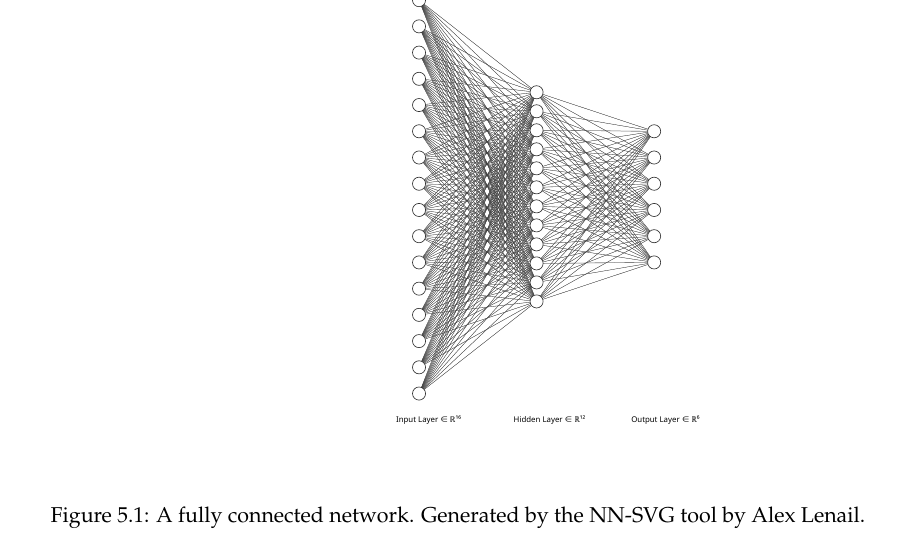

El tipo de arquitectura que queremos estudiar en este curso es una mas apropiada para CNN. La Figura 5.2 muestra la arquitectura del AlexNet (lo vamos a estudiar en esta clase).


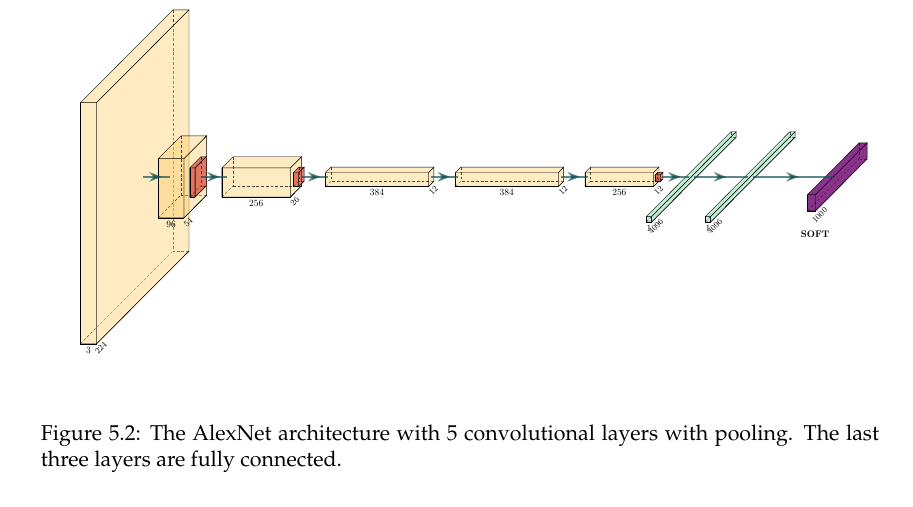

La Figura 5.2 fue descrita oralmente en clase.

## Convolutional Neural Networks (CNN o ConvNets)
Redes neuronales convoluciones.

* Historia: Estas fueron inventadas por Kunihiko  Fukishima(Japones) (la referencia en las notas de clase) en 1980.
Se popularizaron mas en los 90s. Por ejemplo Yann LeCun (referencia en las notas de clase) creo la LeNet family
basada en CNNs sobre los datos MNIST.

* Descripcion rapida: Es una composicion de capas donde los bloques estan formados por

    *  convolucion (los bloques amarillos claros de la Figura 5.2.
    * Pooling. Los bloques marron.
    * Fully connected (los penultimos 2) .
    * softmax (clasificacion).

Es importante notar que las activaciones tambien son parte de la arquitectura.

La Figura 5.3 ilustra una caricatur de la arquitectura.

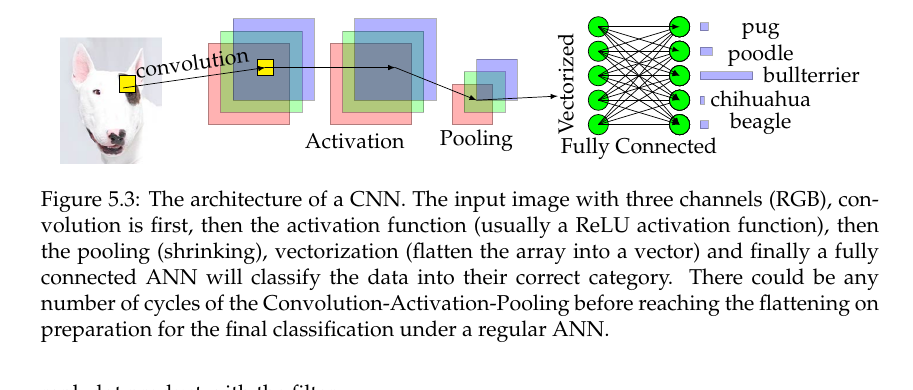

Por que las CNN son tan importantes. Una de las respuestas, la explico enseguida, es por que los "filtros" sirven para extraer patrones de imagenes. Veamos un par ejemplos

1. Si quiere extaer segmentos verticales, se puede usar un filtro como el que sigue

$$\begin{pmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0  \end{pmatrix}  $$
A mano alzada explique la forma como convolucion extrae un patron vertical.

2. Si quiere extaer segmentos horizontales, se puede usar un filtro como el que sigue

$$\begin{pmatrix} 0 & 0 & 0 \\ 1 & 1 & 1 \\ 0 & 0 & 0  \end{pmatrix}  $$

Hay algunos ejemplos en la internet que vale pena llamar a esta clase.
[convolutional deep belief networks](https://www.cs.toronto.edu/~rgrosse/icml09-cdbn.pdf). La Figura 5.4 es tomada de este articulo.



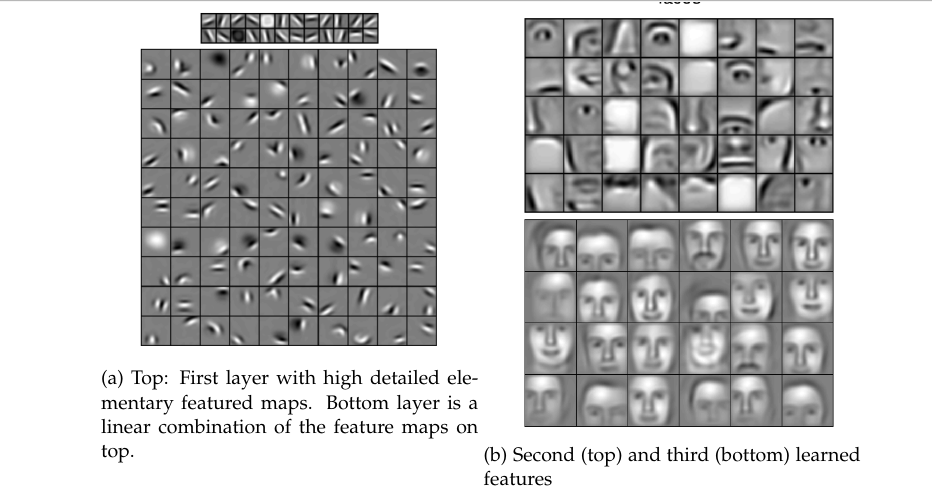

Otro ejemplo es
[CNN curso CS231n](https://cs231n.stanford.edu/)
La Figura de abajo muestra una captura de lo que esta pasando.
Aca se enfoca en **clasificacion**.

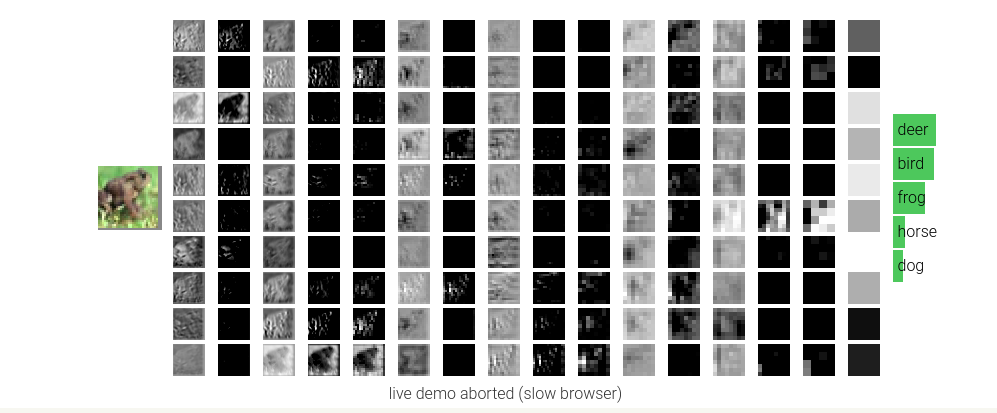

En el entendimiento de lo que hacen las CNN, esta los tipos mostrados arriba: **generativo**, **clasificatorio**.

La Tabla 5.1 resume lo que pasa en este tipo de tecnicas.

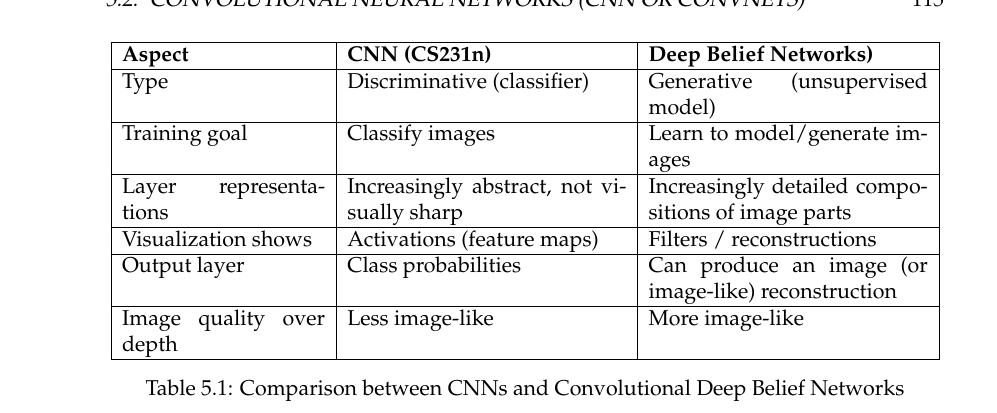




## Capa convolutiva.


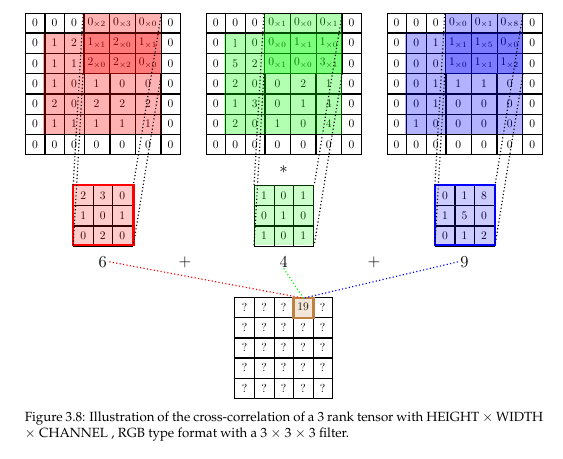

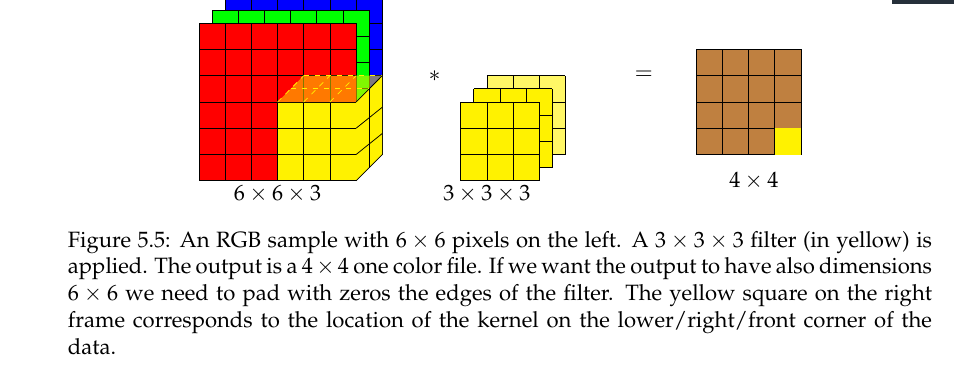

La Figura 3.8 la la describimos anteriormente en el curso.
Habemos mas bien de la Figura 5.5.

* Los datos estan a la izquierda como una imagen RGB.
* El filtro (amarillo) es de $3 \times 3 \times 3$ la tercer indice es la profundidad y debe ser la misma profundidad de los datos para que se cancele esta dimension (ese rango).
* La salida (cafe) a la derecha. El cuadro amarillo ilustra la **convolucion** del filtro con los datos para este evento.
Por que la salida es $4 \times 4 \times 1$.

$$(n-k+p)/s + 1 $$
$s=1, p=0$

Horizontal $$ 6 - 3 + 1 = 4$$
Vertical
$$ 6 - 3 + 1 = 4$$

Profundidad

$$3 - 3 + 1 = 1 $$

Con esta discusion resumimos dos aspectos importantes por los cuales la convolucion es valiosa.

1.
    * La salida es reducidas por el tamanho del "kernel". Si el el kernel es grande, la reduccion es mayor. Ademas esta el "stride", si $s>1$ la reduccion es muchosimo mayor. Veremos hoy el **pooling** que aumenta todavia mas la reduccion en datos, parametros, calculos.

    * No todos los nodos de una capa estan conectados con todos los nodos de la capa siguiente (como ANN). Esto produce una reduccion siginificativa en los parametros. $\theta$s.
    Si por ejemplo el filtro es $3 \times 3$, entonces los parametros son 9 y mientras estemos en esa capa, los parametros siguen siendo los mismos 9.

2. Las CNN son mas intuitivas que las ANN (MLP). Estas ultimas son mas "caja negra".

### Conteo de parametros en la capa convolutiva (convolutional layer).

Consideramos los datos entrada con parametros

$$\text{width} \times \text{height} \times \text{depth} $$

Ahora el kernel tambien tiene tres parametros

$$\text{cwidth} \times \text{cheight} \times \text{depth} $$

Note que la profundidad "depth" es la misma en los casos, por que queremos eliminar esa dimension.

Vamos a contar los parametros "a mano" y usamos TensorFlow para verificar el conteo.

El conteo se hace con la siguiente formula

$$\# \text{parametros} = ( \text{cwidth} \times \text{cheight} \times \text{depth} +1  ) \times \text{filters}$$


**Ejemplo 5.2.1**: Asuma que los datos de entrada son una imagen de $24 \times 24$ pixeles y 3 canales y 15 filtros. Tenemos

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 3 \\
\text{filtros} &=& 14 \\
\# \text{parametros} &=& (3 \times 3 \times 3 + 1) \times 15 = 420
\end{eqnarray}

Agregamos otra capa con 20 filtros de tamanho $3 \times 3$.

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 15 \\
\text{filtros} &=& 20 \\
\# \text{parametros} &=& (3 \times 3 \times 15 + 1) \times 20 = 2720.
\end{eqnarray}

Por ultimo agregamos una capa mas con 5 filtros de tamanho $3 \times 3$.

\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 20 \\
\text{filtros} &=& 5 \\
\# \text{parametros} &=& (3 \times 3 \times 20 + 1) \times 5 = 905
\end{eqnarray}

40Para un total de 4045

Enseguida vamos a crear una red CNN con TensorFlow y verificar el conteo de parametros.

A las 8:00 pm.

In [ ]:
920 + 2720 + 905

# import keras libraries
from keras import layers
from keras import models

model = models.Sequential()

# define a convolutional model with patch (3,3)
# Data is (24x24x3). Filters 15
model.add(layers.Conv2D(filters=15, kernel_size=(3,3), input_shape=(24,24,3)))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 420 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# add a second layer with 20 filters and 3x3 patches
model.add(layers.Conv2D(filters=20, kernel_size=(3,3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 20)          │           2,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,140 (12.27 KB)

 Trainable params: 3,140 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# finally add a new layer with 4 filters and 3x3 patches
model.add(layers.Conv2D(filters=5, kernel_size=(3,3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 20)          │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 5)           │             905 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,045 (15.80 KB)

 Trainable params: 4,045 (15.80 KB)

 Non-trainable params: 0 (0.00 B)

Para verificar el tamanho de las salidas recuerden que
$$\#(z_j) = \frac{N_x - k_x + 2p}{s} + 1 $$

Miremos la  primera:
$$(24 -3)/1 + 1 = 22 $$
$$(24 -3)/1 + 1 = 22 $$
$$((3 -3)/1 + 1)15 = 15 $$



## Capa de activacion.
Ya esta parte esta estudiada en el curso de ML.
Hay muchas activaciones:
* Sigmoid logistic
* Tanh
* ReLu
* softmax
* etc.

[Keras activation functions](https://keras.io/api/layers/activations/).

## Pooling Layer.
El pooling layer es como una convolucion, solo que en vez calcular una "correlacion", calcula una de dos positibildades.

* Average pooling (promedio)
* MaxPooling (el maximo).

Una vez usted de el kernel. Por ejemplo $3 \times 3$. Entonces el pooling se ejectua corriento el kernel a traves de los dato de entrada como si fuera una convolucion, pero en vez de hacer el producto Hadamard, sumado, calcula el maximo o el promedio.

El tamanho despues de pooling (como en la convolucion)

$$\text{size after pooling}= [(n_x - k_x + p_x)/s_x +1 ] \times [(n_y - k_y + p_y)/s_y + 1] $$



El efecto del pooling es doble
* Reduce el tamanho de los datos y operaciones
* Reduce el "overfitting". Extrae propiedades importantes como la media o el maximo.

### MaxPooling:
Retorna el valor del maximo dentro de la ventana de orden $k \times k$.

Veamos un ejemplo. La Figura 5.6 muestra el caso de unos datos de orden $7 \times 7$ con un pooling the filtro $3 \times 3$ (MaxPooling). Stride $s=2$.

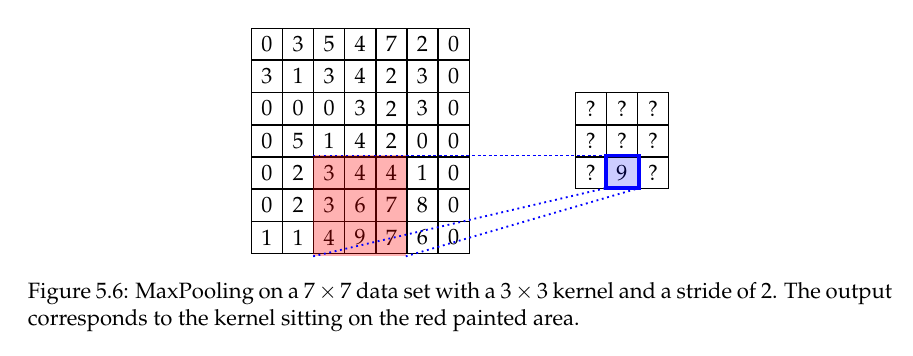

### Average Pooling.
La idea es la misma pero en vez del maximo se calcula el promedio. Ver Figura 5.7

i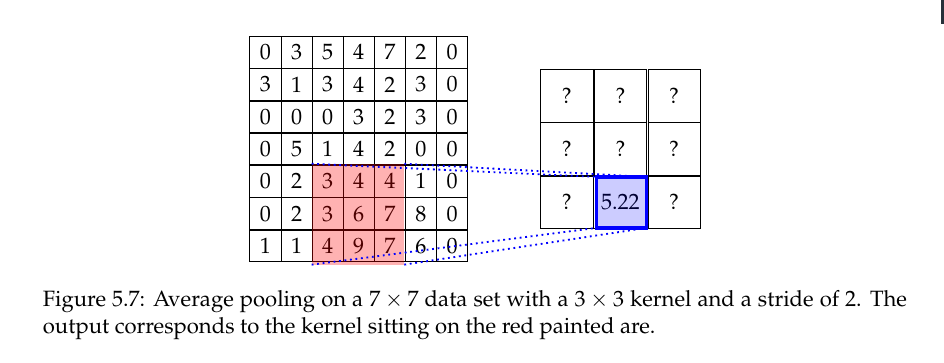

## Fully connected layers (capas completamente conectadas).
Estas son las mismas capas que estudiamos en el MLP (Multi layer Perceptron). Antes de llegar a esta capa vectorizamos el ultimo tenso `numpy.flatten` ? Si por ejemplo el ultimo tensor de $3\times 4 \times 2$ se crea una capa don 24 componentes.
Estas 24 se conectan totalmente a la siguiente capa.

El numero de parametros (training parameters)

$$\# \text{parametros} = (n_i + 1)\times n_o  $$
donde $n_i$ es el numero de nodos de entrada y $n_o$ el numero de nodos de salida.

Los siguientes temas son: Receptive Field (campo receptor) y Regularizacion.  Hoy solo vamos a ver el campo receptor.

## Receptive Field (Campo receptivo).
El **campo receptivo** es la apertura requerida para iluminar una neurona. Es la region de los datos de entrada necsarios para una unidad de salida.

**Ejemplo 5.2.2**:
Este ejeplo es tomado de
[James Allinghma](https://github.com/JamesAllingham/LaTeX-TikZ-Diagrams)

Los datos de entrada son
$$\begin{pmatrix} 9 & 1 & 0 \\ 3 & 3 & 4 \\ 9 & 5 & 0  \end{pmatrix} $$

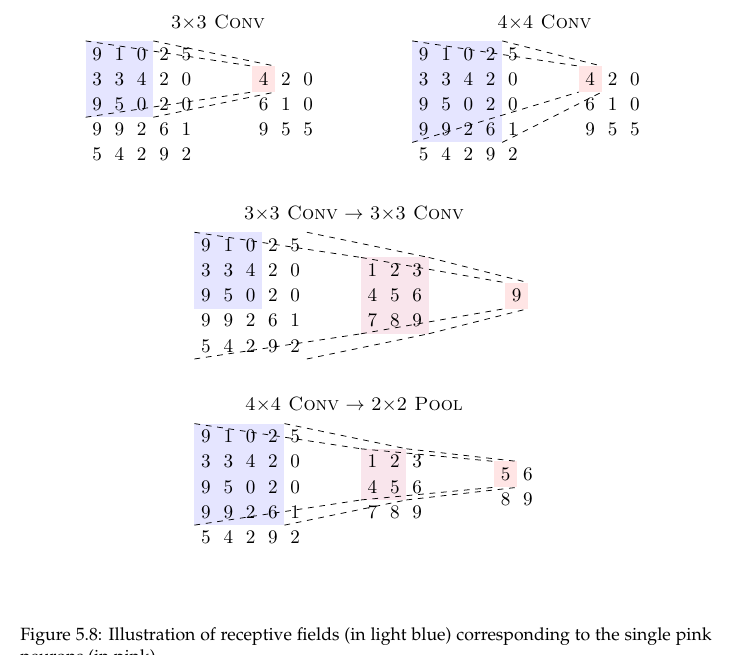

Como calculamos nosotros el campo visual.
$x$ es la incognita. $x$ es el tamano del receptive field.
(campo receptivo). En cada una de sus dimensiones, asumiendo que es cuadrado.

Asumimos $s=1, p=0$.
\begin{eqnarray}
\text{input} &:&  x \\
\text{layer 1} &:&  x - k + 1 \\
\text{layer 2} &:&  x -k + 1 -k + 1 = x - 2k + 2 \\
&\vdots&  \\
\text{layer n} &:&  x - nk + n.
\end{eqnarray}

Hasta donde llegamos? llegamos hasta que

$$x - nk + n = 1 $$
De aca despejamos $x$

$$x = nk -n + 1 = n(k-1) + 1. $$

Verifiquemos esto con el Ejemplo 5.2.2

* $k=3, n=1$
Entonces $x = 3$.

* $k=4, n=1$
Entonces $x = 4$.

* $k=3, n=2$
Entonces $x = 5$.

En el ultimo ejemplo $n=2$, pero hay $k_1, k_2$. Dejamos como tarea investigar la formula para este caso.

Recomiendo el articulo
[theaisummer.com](https://theaisummer.com/receptive-field/)
para quien quiera profundizar o entender mas este concepto.

# Proxima clase
* Regularizacion
* Casos historicos (LeNet 5, AlexNet, etc).